In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Data/owid-co2-data.csv')

In [3]:
print("Columns available:", df.columns.tolist())


Columns available: ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_

In [4]:
required_cols = ['co2', 'gdp', 'population', 'energy_per_capita', 'year', 'country']
df_clean = df.dropna(subset=required_cols).copy()


In [5]:
df_clean = df_clean[df_clean['year'] >= 1990]


In [6]:
df_clean['gdp_per_capita'] = df_clean['gdp'] / df_clean['population']


In [7]:
features = ['gdp', 'population', 'energy_per_capita', 'gdp_per_capita']
target = 'co2'
X = df_clean[features]
y = df_clean[target]

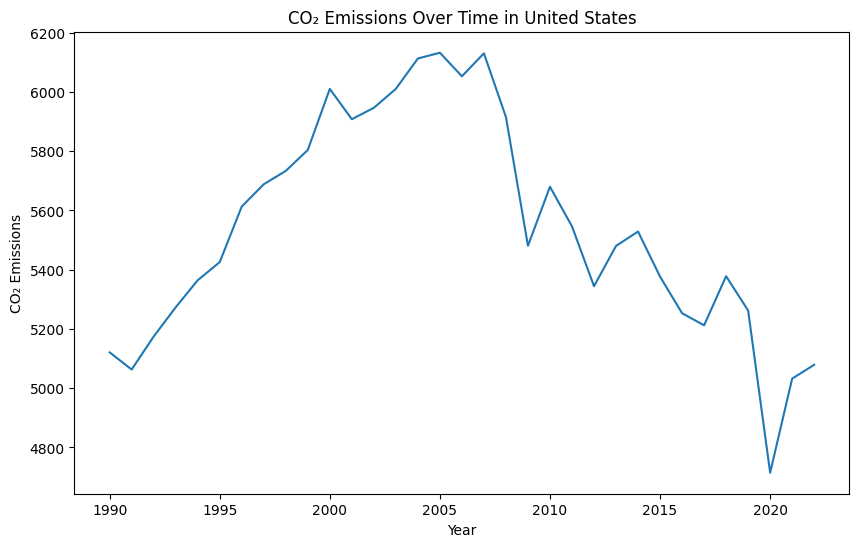

In [8]:
country = 'United States'
df_country = df_clean[df_clean['country'] == country]
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='co2', data=df_country)
plt.title(f'CO₂ Emissions Over Time in {country}')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Baseline Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Baseline Model Performance:
MAE: 8.753539621570496
MSE: 1940.2171253870745
R² Score: 0.9947254202796698


In [13]:
#  Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [14]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters Found:", grid_search.best_params_)


Best Parameters Found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [15]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nOptimized Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))


Optimized Model Performance:
MAE: 8.753539621570496
MSE: 1940.2171253870745
R² Score: 0.9947254202796698


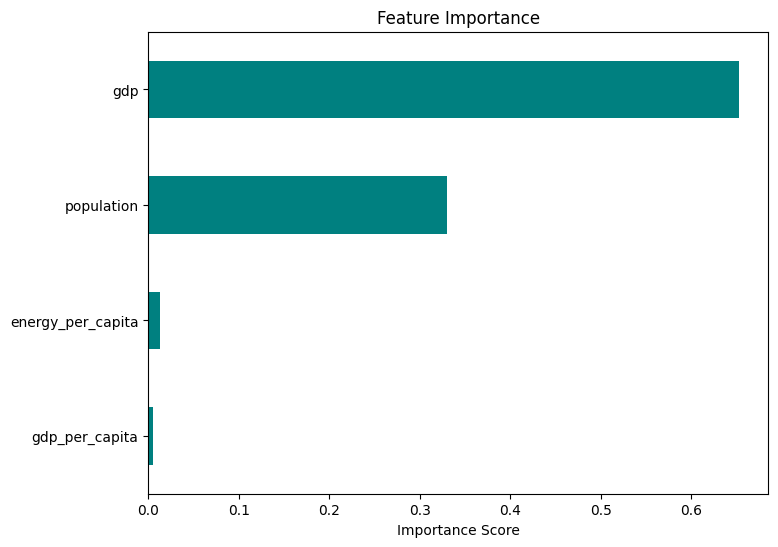

In [16]:
importances = best_model.feature_importances_
feat_importance = pd.Series(importances, index=features)
plt.figure(figsize=(8,6))
feat_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

In [17]:
import joblib
joblib.dump(best_model, 'optimized_co2_emission_model.pkl')
print("Optimized model saved as 'optimized_co2_emission_model.pkl'")

Optimized model saved as 'optimized_co2_emission_model.pkl'
